In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_path = r"C:\Users\PCS\Downloads\Vehical Price\CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [4]:
print(df.info())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [5]:
print(df.describe()) 

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [6]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
df = df.drop_duplicates()

In [9]:
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [10]:
df_encoded = df_encoded.drop('name', axis=1)

In [11]:
sns.set(style='whitegrid', palette='pastel')

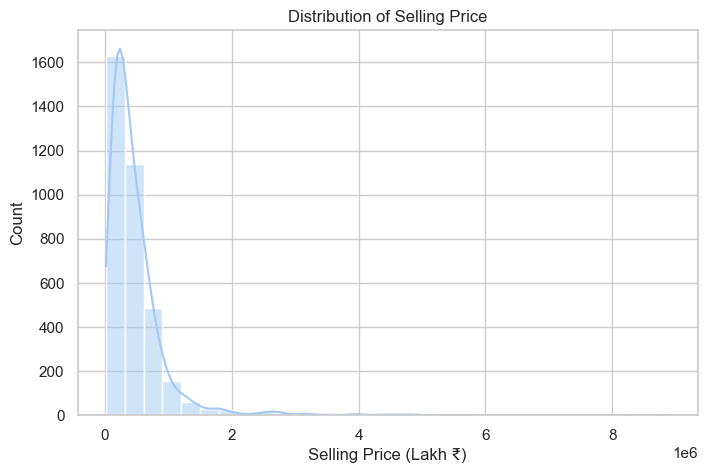

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakh ₹)")
plt.ylabel("Count")
plt.show()

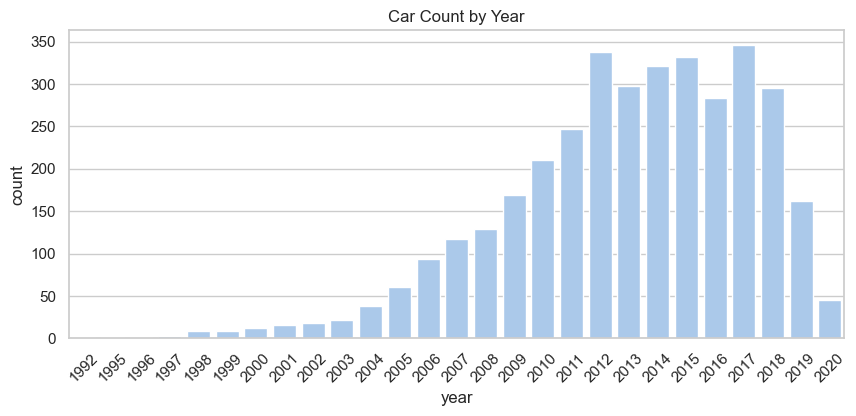

In [13]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.title("Car Count by Year")
plt.xticks(rotation=45)
plt.show()

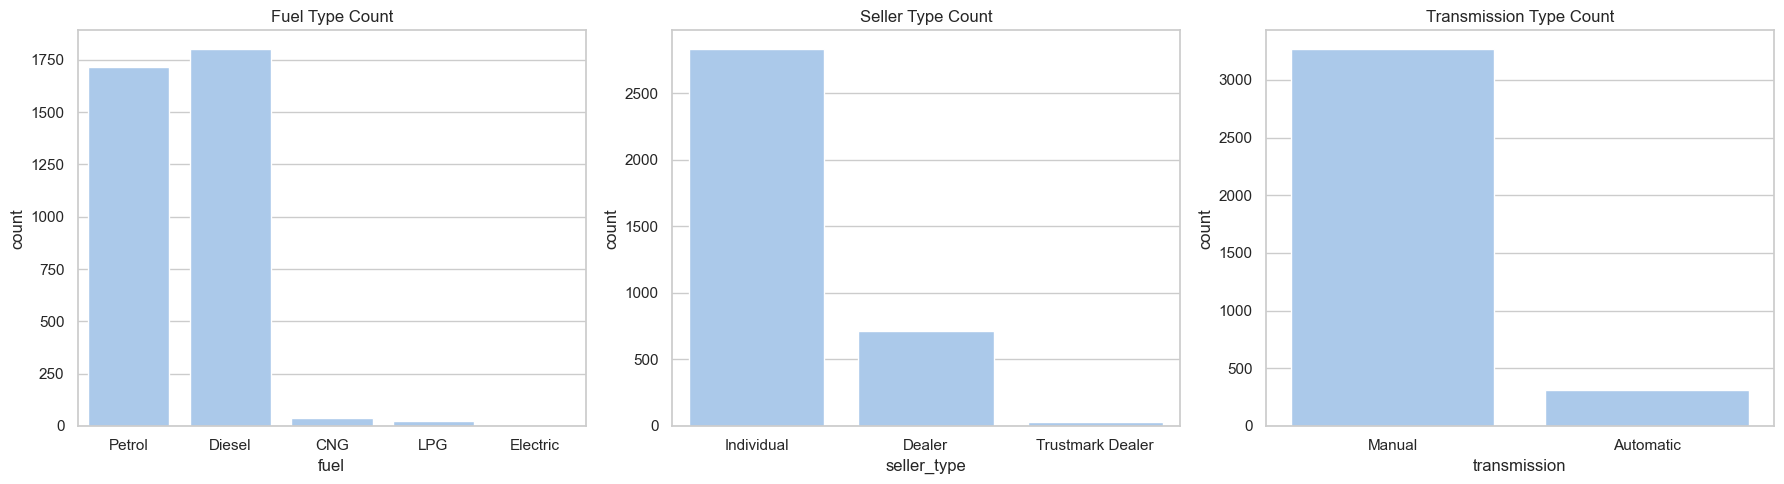

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='fuel', ax=axs[0])
sns.countplot(data=df, x='seller_type', ax=axs[1])
sns.countplot(data=df, x='transmission', ax=axs[2])

axs[0].set_title('Fuel Type Count')
axs[1].set_title('Seller Type Count')
axs[2].set_title('Transmission Type Count')

plt.tight_layout()
plt.show()

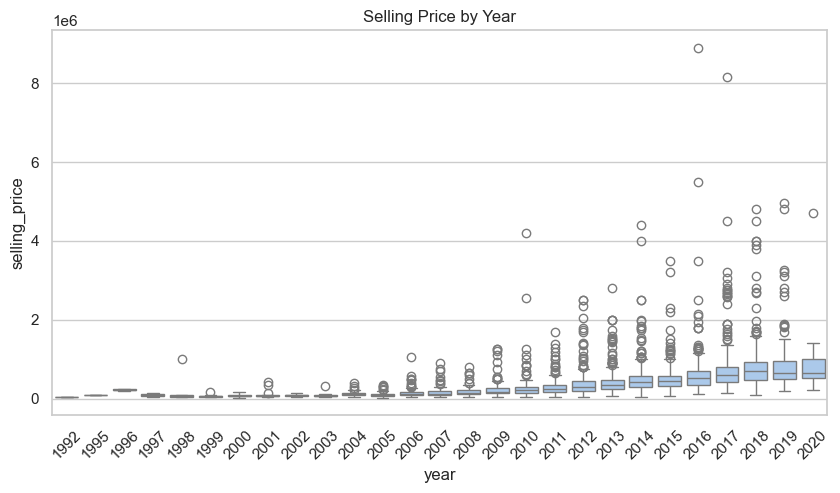

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title("Selling Price by Year")
plt.xticks(rotation=45)
plt.show()

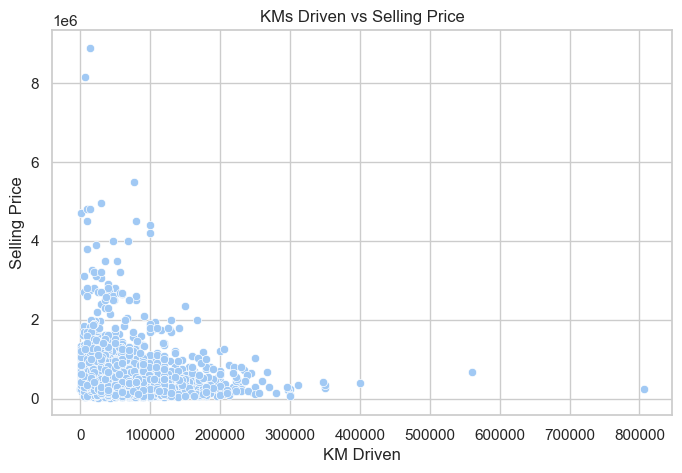

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title("KMs Driven vs Selling Price")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

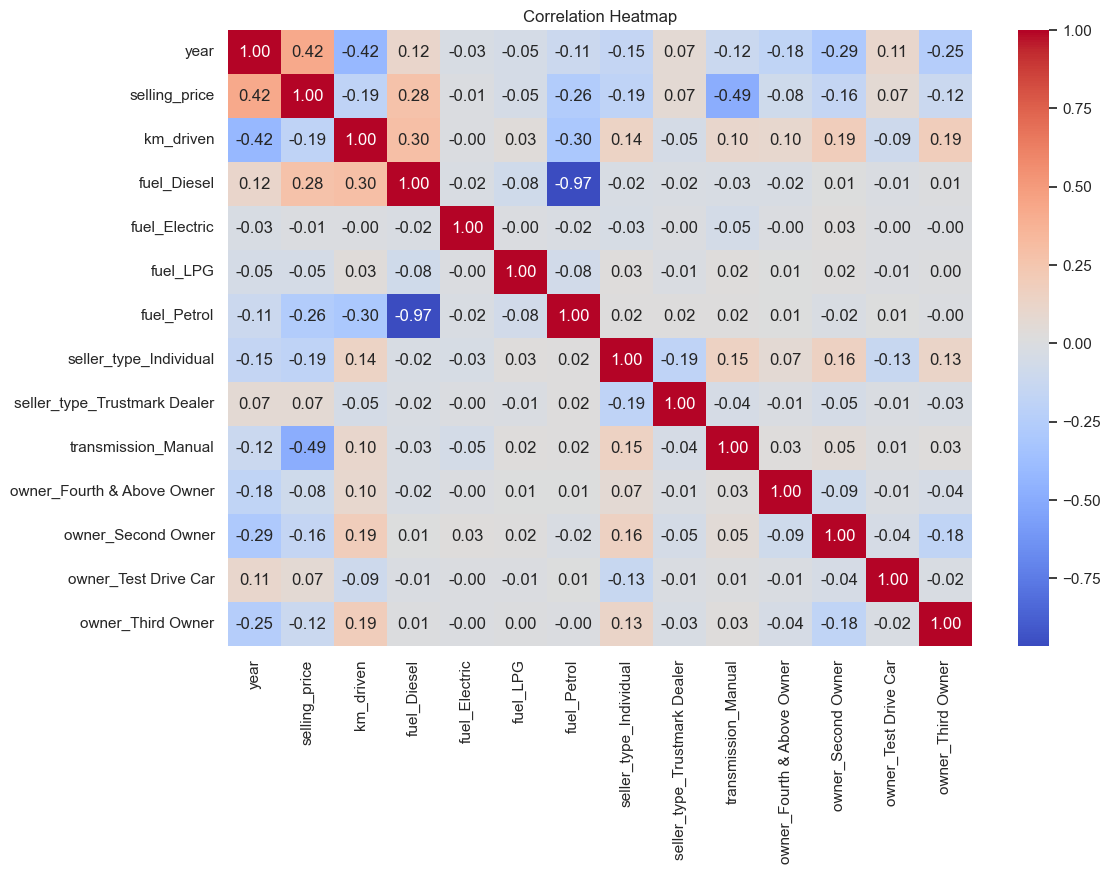

In [17]:
df_encoded = pd.get_dummies(df.drop('name', axis=1), drop_first=True)  # encode for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
data = df.copy()

data.drop('name', axis=1, inplace=True)

data_encoded = pd.get_dummies(data, drop_first=True)

print("Encoded Features:\n", data_encoded.columns)

Encoded Features:
 Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [19]:
X = data_encoded.drop('selling_price', axis=1)
y = data_encoded['selling_price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.39269348342683674
MAE: 213071.17661612376
MSE: 195633685392.37158


In [23]:
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_price = lr_model.predict(sample)

print("\nActual Price:", y_test.iloc[0])
print("Predicted Price:", predicted_price[0])


Actual Price: 270000
Predicted Price: 488618.55876764655


C:\Users\PCS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Random Forest R² Score: 0.4425776121400691


In [25]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Evaluation Metrics:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest Evaluation Metrics:
R² Score: 0.4425776121400691
MAE: 193601.41007051803
MSE: 179564343673.75464
RMSE: 423750.3317683122


C:\Users\PCS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_price_rf = rf_model.predict(sample)

print("\n Sample Prediction:")
print("Actual Price:", y_test.iloc[1])
print("Predicted Price (Random Forest):", round(predicted_price_rf[0], 2))


 Sample Prediction:
Actual Price: 525000
Predicted Price (Random Forest): 472990.09


C:\Users\PCS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
